<p style="border:2px solid black"> </p>
<span style="font-family:Lucida Bright;">
<p style="margin-bottom:1cm"></p>
<center>
<font size="7"><b>Social Data Analysis and Visualization</b></font>
<p style="margin-bottom:1cm"></p>
<font size="3"><b>Final Project</b></font>
<p style="margin-bottom:1cm"></p>
<font size="6"><b>Demographics of Copenhagen</b></font>
<p style="margin-bottom:0.8cm"></p>
<font size="3"><b>Wojciech Mazurkiewicz, DTU, 14 May 2021</b></font>
<p style="margin-bottom:1.5cm"></p>
<font size="6"><b>Data Visualization</b></font>
<br>
<font size="3"><b></b></font>
</center>
<p style="margin-bottom:0.7cm"></p>
<p style="border:2px solid black"> </p>

# How to read this notebook

<p style="border:2px solid black"> </p>

<span style="font-family:Arial;">

Please note that the pre-rendered outputs will first display properly when the notebook is __trusted__.

# Introduction

<p style="border:2px solid black"> </p>

This notebook aims to describe the process of loading and cleaning of the data about different demographical quantites for Copehhagen. Each demographical quantity is described in its own section, and, at the end, the clean data is saved to hard drive in the form of pickled Pandas dataframes.

The data about the different demographical quantities for Copenhagen has been obtained from https://kk.statistikbank.dk. As the web interface only permits a withdrawal of 50,000 cells at a time, it was in many cases necessary to split the data into multiple smaller tables, that needed reassembling. Also, the format and resolution of the data representing the same quantities, such as age and time, was not always consistent, thus a major effort has been invested into cleaning and streamlining the data. 

I have aimed to focus only on data which would allow to trace the change of different demographical quantities in different districts of Copenhagen over time. This quantities include:

1. citizenzhip (danes vs. western and non-western non-danes)
2. marital status
3. family type and children
5. income
6. life span
7. population movement data (immigration, births, deaths, etc.)

However, out of sheer interest, I have also included the information about the entire population of Copenhagen by the country of origin.

# Initialization

<p style="border:2px solid black"> </p>

The initialization procedure, including the definitions of many the functions that will be used to load and clean the data in this notebook, is defined in the [Initialization notebook](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/initialization.html). Let's run it now:

In [10]:
%run ./initialization.ipynb

Loading BokehJS ...

# Country of origin (without district information)

<p style="border:2px solid black"> </p>

##  Source

The data about the population of Copenhagen by the citizens' country of origin was obtained from: www.statistikbanken.dk/FOLK1C.

## Load data

Let's load the data.

In [11]:
# The columns for merging.
merge_on_columns = ['region', 'sex', 'age', 'country of origin']

# Load dataframe.
for idx, years in enumerate(
    ['2008', '2009-2010', '2011-2012', '2013-2014',
     '2015-2016', '2017-2018', '2019-2020']):

    # Define the path to the data file.
    path_csv = (
        path_data_without_district_info_root /
        ('cph_population_by_country_' + years + '.csv')
    )

    # Merge the dataframes.
    if idx == 0:
        df_country_raw = pd.read_csv(path_csv,
                                     sep='\t',
                                     skiprows=0,
                                     encoding='windows-1252')
    else:
        df_country_raw = df_country_raw.merge(
            pd.read_csv(path_csv,
                        sep='\t',
                        skiprows=0,
                        encoding='windows-1252'),
            left_on=merge_on_columns,
            right_on=merge_on_columns
        )

# Show the dataframe.
display(df_country_raw)

,region,sex,age,country of origin,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1,2010Q2,2010Q3,2010Q4,2011Q1,2011Q2,2011Q3,2011Q4,2012Q1,2012Q2,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,2015Q1,2015Q2,2015Q3,2015Q4,2016Q1,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4
0,Copenhagen,Men,0-4 years,Total,16516,16623,16708,16857,17122,17352,17503,17656,17935,18176,18314,18523,18730,18916,19039,19162,19186,19325,19463,19438,19508,19623,19721,19617,19581,19607,19640,19646,19591,19598,19602,19530,19500,19589,19726,19840,19935,20086,20151,20209,20184,20304,20452,20451,20459,20479,20660,20695,20663,20745,20740,20617
1,Copenhagen,Men,0-4 years,Denmark,13303,13416,13542,13699,13930,14136,14295,14446,14726,14949,15082,15244,15426,15589,15732,15824,15857,16004,16125,16144,16165,16289,16351,16229,16225,16262,16249,16206,16129,16096,16081,16016,15989,16048,16152,16253,16336,16434,16499,16539,16516,16629,16754,16729,16775,16794,16919,16961,16951,17054,17099,17004
2,Copenhagen,Men,0-4 years,Albania,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,3,4,4,4,4,6,6,6,6,5,6,6,5,5,5,5,5,5,6,6,6,5,4,5,6,5,7,9,10,10,11,10
3,Copenhagen,Men,0-4 years,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Copenhagen,Men,0-4 years,Belgium,1,2,1,1,1,2,2,4,5,4,4,4,5,5,6,6,6,7,8,9,7,7,7,7,7,6,9,8,7,6,8,6,5,7,7,10,10,10,11,12,14,15,15,12,11,14,10,9,7,9,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,Copenhagen,Women,100 years and over,Vanuatu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9992,Copenhagen,Women,100 years and over,East Timor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9993,Copenhagen,Women,100 years and over,Pacific Islands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9994,Copenhagen,Women,100 years and over,Stateless,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Clean data

Let's start by dropping the information about the region, as it is always set to "Copenhagen":

In [12]:
# Drop region information (as they are all about Copenhagen).
df_country = df_country_raw.drop(
    ['region'], axis=1)

Now, we can clean the data so that:
- The ***year***, ***quarter***, and ***number of people*** will appear in designated columns.
- The age is standardized to 10 - year intervals.

this is done using the functions `clean_cph_dataframe`, which is defined in the [Initialization notebook](https://social-data-analysis-and-visualization-final-project.s3.eu-central-1.amazonaws.com/initialization.html).

In [6]:
# Clean and standardize the dataframe
df_country = clean_cph_dataframe(df_country,
                                 value_name='Number of people',
                                 df_name='Country of origin')

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['Sex', 'Age', 'Country of origin']
df_country = set_data_types(df_country, columns_int, columns_str)

# Show dataframe.
display(df_country)

<ipython-input-2-fccdc68de5fa>:132: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  df = df.melt(


ValueError: No objects to concatenate

## Show data

#### Population by country of origin vs year

Drop 2008 to set the number of available years to 12 for convenience of viewing.

In [5]:
df_country = df_country[df_country['Year'] != 2008]
display(df_country)

,Year,Quarter,Sex,Age,Country of origin,Number of people
1,2009,4,Men,0-9 years,Abu Dhabi,0.0
2,2010,4,Men,0-9 years,Abu Dhabi,0.0
3,2011,4,Men,0-9 years,Abu Dhabi,0.0
4,2012,4,Men,0-9 years,Abu Dhabi,0.0
5,2013,4,Men,0-9 years,Abu Dhabi,0.0
...,...,...,...,...,...,...
61875,2016,4,Women,>= 90 years,Zimbabwe,0.0
61876,2017,4,Women,>= 90 years,Zimbabwe,0.0
61877,2018,4,Women,>= 90 years,Zimbabwe,0.0
61878,2019,4,Women,>= 90 years,Zimbabwe,0.0


Get the population for each country of origin by year (4th quarter):

In [6]:
df_country_vs_year = (
    df_country
    .loc[:,
         ['Year', 'Country of origin', 'Number of people']]
    .groupby(['Year', 'Country of origin'])
    .sum()
    .unstack(level=1)
    .droplevel(0, axis=1)
)

display(df_country_vs_year)

Country of origin,Abu Dhabi,Afghanistan,Africa not stated,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Asia not stated,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,British West Indies,Brunei,Bulgaria,Burkina Faso,Burundi,Cambodia,Cameroon,Canada,...,Stateless,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan,Tajikistan,Tanzania,Thailand,Togo,Tonga,Total,Trinidad and Tobago,Trucial Oman,Tunisia,Turkey,Turkmenistan,Tuvalu,USA,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Vatican City State,Venezuela,Vietnam,West Indies,West bank and Gaza,Yemen,Yugoslavia,"Yugoslavia, Federal Republic",Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009,0.0,"1,168.0",16.0,54.0,587.0,0.0,44.0,0.0,298.0,147.0,0.0,7.0,595.0,292.0,59.0,1.0,20.0,383.0,9.0,65.0,242.0,1.0,14.0,0.0,11.0,61.0,"1,661.0",5.0,651.0,0.0,2.0,546.0,12.0,98.0,47.0,128.0,582.0,...,138.0,179.0,7.0,"4,033.0",387.0,987.0,97.0,8.0,247.0,"1,739.0",57.0,7.0,"526,918.0",34.0,0.0,483.0,"8,067.0",3.0,0.0,"2,502.0",353.0,416.0,40.0,"2,878.0",104.0,39.0,0.0,0.0,99.0,988.0,2.0,0.0,70.0,"4,245.0",111.0,40.0,45.0
2010,0.0,"1,159.0",17.0,67.0,609.0,0.0,38.0,0.0,303.0,147.0,0.0,5.0,653.0,311.0,64.0,2.0,18.0,475.0,8.0,70.0,263.0,4.0,17.0,0.0,10.0,65.0,"1,736.0",5.0,711.0,0.0,2.0,756.0,14.0,104.0,46.0,145.0,650.0,...,140.0,174.0,8.0,"4,118.0",421.0,"1,012.0",104.0,9.0,260.0,"1,838.0",66.0,7.0,"538,031.0",39.0,0.0,499.0,"7,974.0",3.0,0.0,"2,821.0",375.0,478.0,40.0,"3,002.0",103.0,46.0,0.0,0.0,117.0,"1,026.0",2.0,0.0,77.0,"4,190.0",113.0,51.0,51.0
2011,0.0,"1,231.0",23.0,64.0,594.0,1.0,34.0,0.0,306.0,152.0,0.0,6.0,661.0,320.0,63.0,2.0,29.0,617.0,7.0,77.0,245.0,3.0,16.0,0.0,11.0,62.0,"1,769.0",5.0,748.0,0.0,2.0,966.0,14.0,106.0,53.0,149.0,649.0,...,147.0,187.0,9.0,"4,203.0",404.0,"1,036.0",107.0,10.0,257.0,"1,878.0",64.0,7.0,"548,443.0",40.0,0.0,502.0,"7,926.0",3.0,0.0,"2,853.0",388.0,510.0,44.0,"3,109.0",100.0,55.0,0.0,0.0,128.0,"1,064.0",2.0,0.0,75.0,"4,130.0",117.0,48.0,50.0
2012,0.0,"1,285.0",26.0,77.0,595.0,1.0,35.0,0.0,312.0,151.0,0.0,6.0,710.0,348.0,66.0,2.0,29.0,690.0,7.0,78.0,261.0,2.0,16.0,0.0,10.0,55.0,"1,818.0",7.0,776.0,0.0,2.0,"1,134.0",14.0,110.0,60.0,151.0,662.0,...,134.0,191.0,8.0,"4,159.0",423.0,"1,073.0",114.0,9.0,257.0,"1,872.0",66.0,3.0,"557,920.0",35.0,0.0,513.0,"7,797.0",1.0,0.0,"2,960.0",401.0,525.0,41.0,"3,199.0",93.0,58.0,0.0,0.0,137.0,"1,132.0",2.0,0.0,77.0,"3,987.0",99.0,51.0,51.0
2013,0.0,"1,341.0",13.0,100.0,601.0,0.0,30.0,0.0,347.0,151.0,0.0,6.0,733.0,369.0,79.0,2.0,30.0,793.0,7.0,84.0,283.0,2.0,15.0,0.0,12.0,58.0,"1,867.0",9.0,781.0,0.0,3.0,"1,272.0",14.0,115.0,61.0,177.0,671.0,...,121.0,206.0,7.0,"4,325.0",415.0,"1,123.0",108.0,10.0,258.0,"1,884.0",64.0,3.0,"569,000.0",38.0,0.0,525.0,"7,784.0",1.0,0.0,"3,233.0",402.0,568.0,39.0,"3,308.0",96.0,61.0,0.0,0.0,145.0,"1,163.0",2.0,0.0,82.0,"3,786.0",102.0,61.0,51.0
2014,0.0,"1,368.0",15.0,104.0,625.0,0.0,33.0,1.0,376.0,152.0,0.0,4.0,780.0,385.0,73.0,2.0,29.0,903.0,7.0,93.0,310.0,3.0,16.0,0.0,11.0,64.0,"1,938.0",8.0,835.0,0.0,2.0,"1,446.0",15.0,113.0,62.0,174.0,719.0,...,120.0,220.0,8.0,"4,453.0",430.0,"1,181.0",133.0,9.0,261.0,"1,909.0",67.0,3.0,"579,513.0",43.0,0.0,512.0,"7,676.0",1.0,0.0,"3,335.0",422.0,630.0,46.0,"3,441.0",98.0,56.0,0.0,0.0,145.0,"1,241.0",2.0,0.0,79.0,"3,663.0",101.0,52.0,50.0
2015,0.0,"1,394.0",15.0,113.0,633.0,2.0,41.0,1.0,526.0,163.0,0.0,5.0,894.0,420.0,74.0,2.0,25.0,951.0,7.0,108.0,309.0,3.0,24.0,0.0,12.0,53.0,"1,981.0",8.0,897.0,0.0,2.0,"1,594.0",16.0,122.0,67.0,165.0,761.0,...,119.0,225.0,9.0,"4,582.0",465.0,"1,212.0",139.0,8.0,248.0,"1,940.0",66.0,9.0,"589,699.0",38.0,0.0,531.0,"7,732.0",2.0,0.0,"3,673.0",438.0,673.0,53.0,"3,691.0",100.0,58.0,0.0,0.0,143.0,"1,258.0",2.0,0.0,87.0,"3,539.0",99.0,56.0,48.0
2016,0.0,"1,455.0",17.0,125.0,634.0,2.0,54.0,1.0,665.0,162.0,0.0,5.0,"1,005.0",

#### Top 10 countries

In [7]:
# Get a list of countries represented in the dataframe,
# Sorted by summarized number of people over the years
countries_sorted_by_number_of_people = (
    df_country_vs_year
    .sum()
    .sort_values(ascending=False)
    .index
    .to_list()
)

# Show the countries sorted by population
# display(countries_sorted_by_number_of_people)

# Years from biggest to smallest.
years = df_country_vs_year.index.to_list()
years.sort(reverse=True)

##### ... by population 

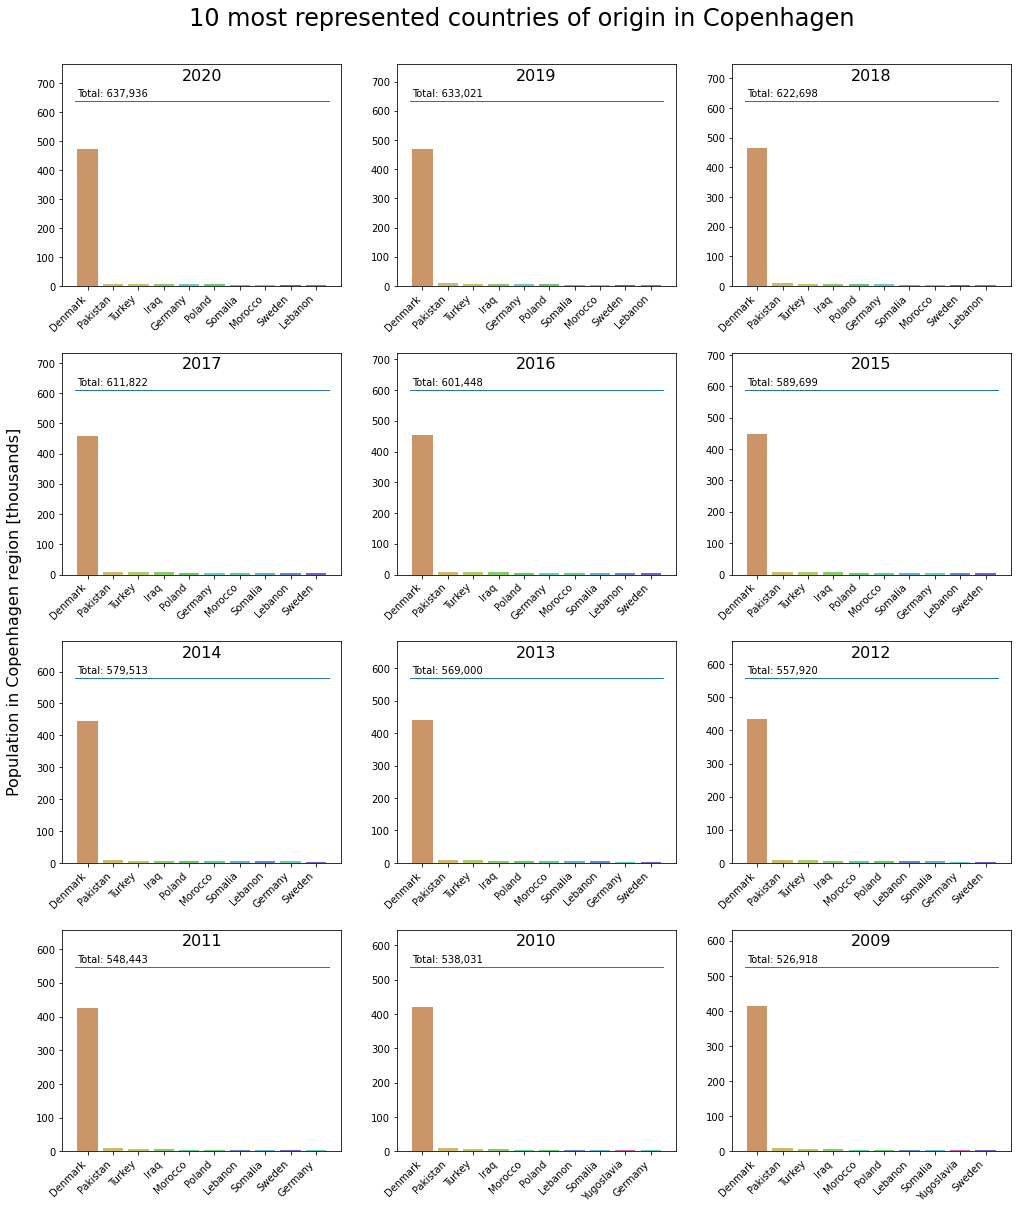

In [8]:
# Get the number of years.
n_years = len(years)

# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a figure for the plots.
figure, all_axes = plt.subplots(
    n_plot_rows, n_plot_columns,
    figsize=(5 * n_plot_columns + 2, 5 * n_plot_rows),
    gridspec_kw={'hspace': 0.3}
)

# Get the handles of the bottom axes'.
bottom_axes = all_axes[-1, :]

# Define colors.
n_countries_to_map = 15
color_palette = sns.color_palette("hls",
                                  n_colors=n_countries_to_map)

# Map the colors to countries.
color_mapping = {country: color
                 for country, color
                 in zip(countries_sorted_by_number_of_people[:n_countries_to_map],
                        color_palette)}

# Plot.
for idx, (year, axes) in enumerate(zip(years, all_axes.ravel()[:n_plots])):

    total = df_country_vs_year.at[year, 'Total']

    sns.barplot(
        data=(
            df_country_vs_year
            .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
            .sort_values(ascending=False)
            .head(10)
            .div(1e3)
            .reset_index()
        ),
        x='Country of origin',
        y=year,
        ax=axes,
        palette=color_mapping)

    # Set the title of the plot.
    axes.set_title(year, y=0.9)
    axes.set_xlabel('')
    axes.set_ylabel('')
    axes.set_ylim([axes.get_ylim()[0], total / 1e3 * 1.2])
    
    draw_threshold(total * 1e-3, axes, title=f'Total: {total:,.0f}')

    # Rotate x tick labels.
    plt.setp(
        axes.get_xticklabels(),
        rotation=45,
        ha='right',
        va='top',
    )

    # Apply the standard formatting.
    format_axes_annotation(axes)

# Annotate the figure.
# figure_x_label(figure, 'Day of week', y_position=0.06)
figure_y_label(figure, 'Population in Copenhagen region [thousands]', x_position=0.08)
figure.suptitle('10 most represented countries of origin in Copenhagen', 
                size=24,
                y=0.92)
figure.set_facecolor("white")

##### ... by percentage 

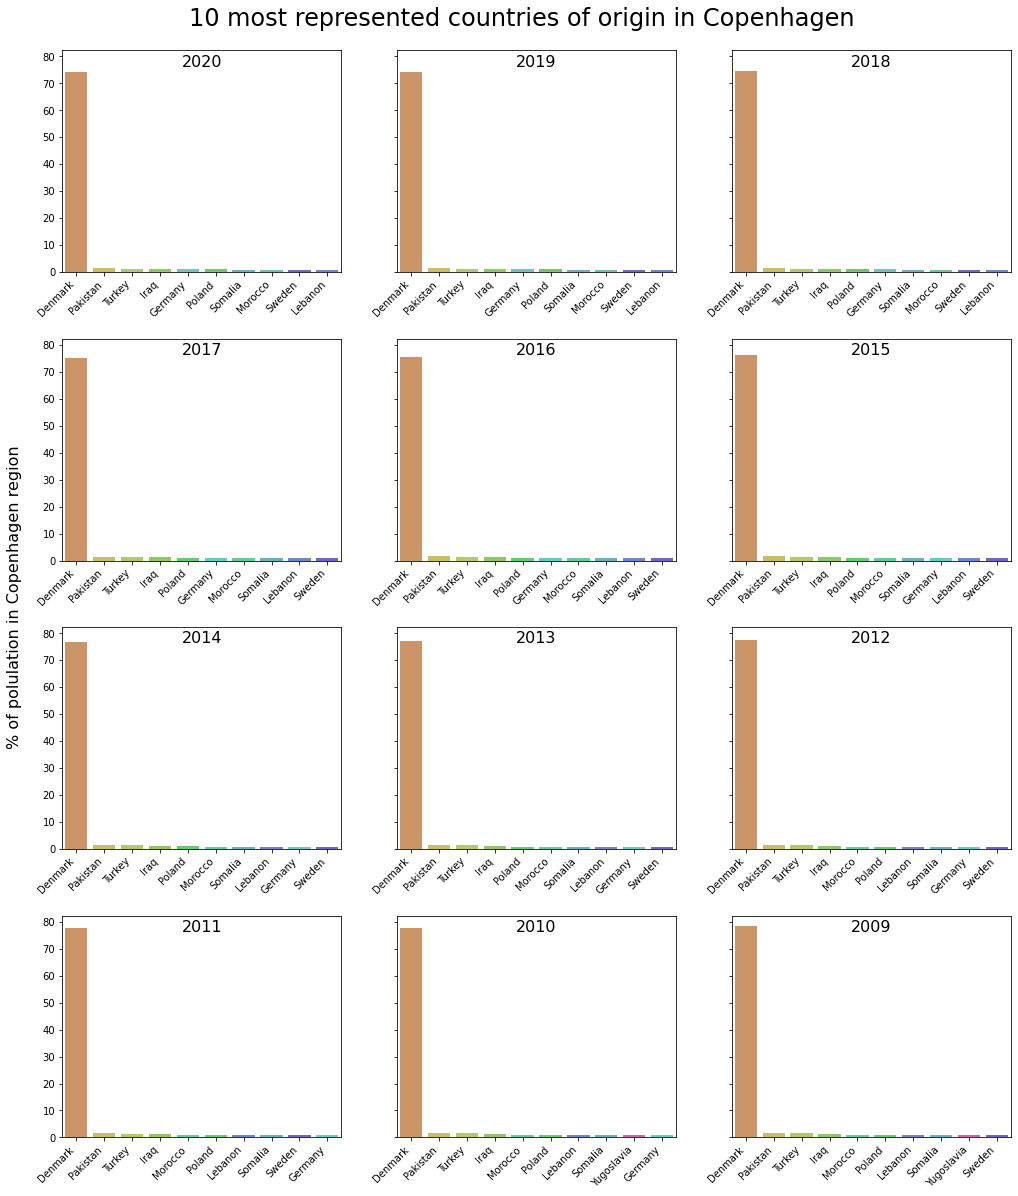

In [9]:
# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a figure for the plots.
figure, all_axes = plt.subplots(
    n_plot_rows, n_plot_columns,
    sharey='all',
    figsize=(5 * n_plot_columns + 2, 5 * n_plot_rows),
    gridspec_kw={'hspace': 0.3}
)

# Get the handles of the bottom axes'.
bottom_axes = all_axes[-1, :]

# Define colors.
n_countries_to_map = 15
color_palette = sns.color_palette("hls",
                                  n_colors=n_countries_to_map)

# Map the colors to countries.
color_mapping = {country: color
                 for country, color
                 in zip(countries_sorted_by_number_of_people[:n_countries_to_map],
                        color_palette)}

# Plot.
for idx, (year, axes) in enumerate(zip(years, all_axes.ravel()[:n_plots])):
    
    # The total number of people in Copenhagen.
    total = df_country_vs_year.at[year, 'Total']
    
    # Show the barplot.
    sns.barplot(
        data=(
            df_country_vs_year
            .loc[year, ~df_country_vs_year.columns.isin(['Total'])]
            .sort_values(ascending=False)
            .head(10)
            .mul(100 / total)
            .reset_index()
        ),
        x='Country of origin',
        y=year,
        ax=axes,
        palette=color_mapping)

    # Set the title of the plot.
    axes.set_title(year, y=0.9)
    axes.set_xlabel('')
    axes.set_ylabel('')

    # Rotate x tick labels.
    plt.setp(
        axes.get_xticklabels(),
        rotation=45,
        ha='right',
        va='top',
    )

    # Apply the standard formatting.
    format_axes_annotation(axes)

# Annotate the figure.
# figure_x_label(figure, 'Day of week', y_position=0.06)
figure_y_label(figure, r'% of polulation in Copenhagen region', x_position=0.08)
figure.suptitle('10 most represented countries of origin in Copenhagen', 
                size=24,
                y=0.91)

figure.set_facecolor("white")

##### Danes vs non-danes 

In [10]:
# Get the number of counries.
n_countries = len(countries_sorted_by_number_of_people)

# Get the number of plots.
n_plots = len(years)

# Define the plot grid.
n_plot_columns = 3
n_plot_rows = int(np.ceil(n_plots / n_plot_columns))

# Create a dataframe with data for danes vs non-danes.
df_danes_vs_non_danes = (
    df_country_vs_year
    .loc[:, 'Denmark']
    .to_frame('Danes')
)

df_danes_vs_non_danes['Non-danes'] = (
    df_country_vs_year
    .loc[:, ~df_country_vs_year.columns.isin(['Total', 'Denmark'])]
    .sum(axis=1)
    .to_frame('Non-danes')
)

df_danes_vs_non_danes[['Pct danes', 'Pct non-danes']] = (
    df_danes_vs_non_danes[['Danes', 'Non-danes']]
    .div(df_danes_vs_non_danes.sum(axis=1), axis=0)
    .mul(100)
)

# Show the dataframe
display(df_danes_vs_non_danes)

,Danes,Non-danes,Pct danes,Pct non-danes
Year,,,,
2009,"413,053.0","113,865.0",78.4,21.6
2010,"418,837.0","119,194.0",77.8,22.2
2011,"426,377.0","122,066.0",77.7,22.3
2012,"433,433.0","124,487.0",77.7,22.3
2013,"439,824.0","129,176.0",77.3,22.7
2014,"444,817.0","134,696.0",76.8,23.2
2015,"449,463.0","140,236.0",76.2,23.8
2016,"454,826.0","146,622.0",75.6,24.4
2017,"460,071.0","151,751.0",75.2,24.8


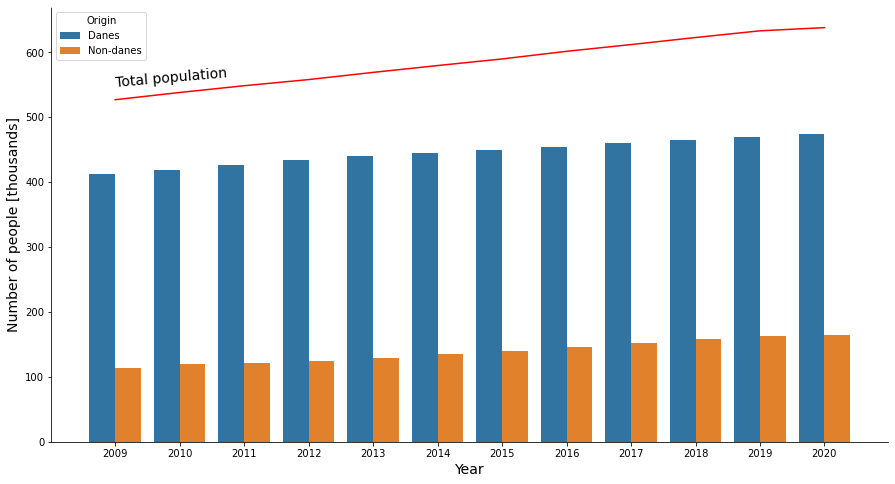

In [11]:
# Create a figure for the plots.
figure, axes = plt.subplots(figsize=(15, 8))

# Create the barplot for each year.
sns.barplot(data=(df_danes_vs_non_danes[['Danes', 'Non-danes']]
                  .div(1e3)
                  .reset_index()
                  .melt(id_vars='Year',
                        var_name='Origin',
                        value_name='Number of people')),
            x='Year',
            y='Number of people',
            hue='Origin',
            ax=axes)

# Total population over the years.
total = (
    df_danes_vs_non_danes[['Danes', 'Non-danes']]
    .div(1e3)
    .sum(axis=1)
    .to_numpy()
)

axes.plot(df_danes_vs_non_danes[['Danes', 'Non-danes']].div(1e3).sum(axis=1).to_numpy(),
          color='red')

axes.set_ylabel('Number of people [thousands]')
axes.text(0, total[0] + 20, 'Total population', rotation = 5, size=14)

format_axes(axes)
format_axes_annotation(axes)
figure.set_facecolor("white")

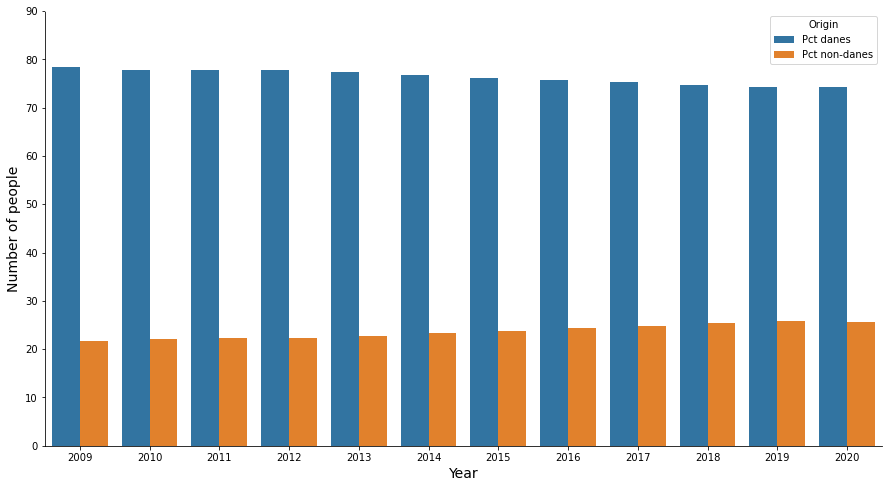

In [12]:
# Create a figure for the plots.
figure, axes = plt.subplots(figsize=(15, 8))

# Create the barplot for each year.
sns.barplot(data=(df_danes_vs_non_danes[['Pct danes', 'Pct non-danes']]
                  .reset_index()
                  .melt(id_vars='Year',
                        var_name='Origin',
                        value_name='Number of people')),
            x='Year',
            y='Number of people',
            hue='Origin',
            ax=axes)

# Set axes limits (to make room for the legend)
axes.set_ylim((0, 90))

format_axes(axes)
format_axes_annotation(axes)
figure.set_facecolor("white")

<p style="border:2px solid black"> </p>

# Citizenship (with district)

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF8

## Load data

In [13]:
# Get file paths to all the paths.
paths_csv = [path_csv
             for path_csv in path_data_citizenship_root.glob('**/*.csv')
             if path_csv.is_file()]

# Load the dataframe from files.
df_citizenship_raw = load_split_dataframe(paths_csv)

# Show the dataframe
display(df_citizenship_raw)

,citizenship,age,sex,district,1980Q1,1981Q1,1982Q1,1983Q1,1984Q1,1985Q1,1986Q1,1987Q1,1988Q1,1989Q1,1990Q1,1991Q1,1992Q1,1993Q1,1994Q1,1995Q1,1996Q1,1997Q1,1998Q1,1999Q1,2000Q1,2001Q1,2002Q4,2003Q4,2004Q4,2005Q4,2006Q4,2007Q4,2008Q4,2009Q4,2010Q4,2011Q4,2012Q4,2013Q4,2014Q4,2015Q4,2016Q4,2017Q4,2018Q4,2019Q4,2020Q4
0,Denmark,0-4 years,Men,Copenhagen total,9146,8814,8733,8723,8700,8526,8390,8426,8690,9102,9632,9970,10443,11017,11338,11663,11951,12280,12348,12630,12870,13494,14296,14542,14497,14439,14508,14970,15388,16130,16866,17408,17641,17650,17523,17236,17549,17842,17992,18148,18158
1,Denmark,0-4 years,Men,District - Indre By,817,788,798,778,729,728,751,720,710,773,805,795,793,846,849,864,944,1018,1001,1065,1155,1207,1255,1283,1252,1259,1293,1271,1270,1276,1291,1325,1354,1342,1337,1337,1353,1316,1311,1300,1262
2,Denmark,0-4 years,Men,District - Østerbro,1245,1246,1244,1232,1196,1128,1113,1110,1128,1194,1263,1335,1368,1478,1570,1620,1670,1779,1820,1872,1854,1920,2012,2097,2103,2095,2027,2111,2173,2268,2319,2342,2332,2336,2290,2186,2145,2171,2161,2193,2154
3,Denmark,0-4 years,Men,District - Nørrebro,1266,1216,1216,1193,1183,1241,1203,1221,1279,1363,1443,1502,1607,1696,1684,1757,1787,1794,1872,1890,1945,2066,2312,2309,2304,2225,2144,2158,2105,2188,2260,2310,2307,2339,2384,2354,2467,2533,2604,2536,2501
4,Denmark,0-4 years,Men,District - Vesterbro/Kongens Enghave,990,939,929,920,935,842,788,768,796,812,888,954,952,976,1005,1039,1008,1048,1092,1164,1233,1346,1515,1617,1611,1616,1574,1675,1729,1880,2040,2153,2142,2135,2106,2093,2176,2213,2268,2343,2368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7675,Non-western countries,95+years,Women,Polling area - 9. Syd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7676,Non-western countries,95+years,Women,Polling area - 9. Øst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7677,Non-western countries,95+years,Women,Polling area - 9. Vest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
7678,Non-western countries,95+years,Women,Polling area - 9. Midt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Clean data

In [14]:
# Add district type and clean the district and time data.
df_citizenship = clean_cph_dataframe(df_citizenship_raw,
                                     value_name='Number of people',
                                     df_name='Citizenship')

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Sex', 'Age', 'Citizenship']
df_citizenship = set_data_types(df_citizenship, columns_int, columns_str)

# Save the clean data.
df_citizenship.to_pickle(path_data_clean_root /
                         'cph_population_by_citizenship.pkl')

# Show the dataframe.
display(df_citizenship)

,Year,Quarter,District,District type,Sex,Age,Citizenship,Number of people
0,1980,1,1. Nord,Polling area,Men,0-9 years,Denmark,265.0
1,1981,1,1. Nord,Polling area,Men,0-9 years,Denmark,278.0
2,1982,1,1. Nord,Polling area,Men,0-9 years,Denmark,265.0
3,1983,1,1. Nord,Polling area,Men,0-9 years,Denmark,249.0
4,1984,1,1. Nord,Polling area,Men,0-9 years,Denmark,249.0
...,...,...,...,...,...,...,...,...
157435,2016,4,Østerbro,District,Women,>= 90 years,Western countries,3.0
157436,2017,4,Østerbro,District,Women,>= 90 years,Western countries,4.0
157437,2018,4,Østerbro,District,Women,>= 90 years,Western countries,5.0
157438,2019,4,Østerbro,District,Women,>= 90 years,Western countries,6.0


## Show statistics

In [15]:
show_stats(df_citizenship)

,Data types
Year,Int64
Quarter,Int64
District,object
District type,object
Sex,object
Age,object
Citizenship,object
Number of people,float64


,Number of missing values
Year,0
Quarter,0
District,0
District type,0
Sex,0
Age,0
Citizenship,0
Number of people,0


,Year,Quarter,District,District type,Sex,Age,Citizenship,Number of people
count,"157,440.0","157,440.0",157440,157440,157440,157440,157440,"157,440.0"
unique,NaN,NaN,64,3,2,10,3,NaN
top,NaN,NaN,2. Syd,Polling area,Women,10-19 years,Western countries,NaN
freq,NaN,NaN,2460,130380,78720,15744,52480,NaN
mean,"2,000.0",2.4,NaN,NaN,NaN,NaN,NaN,401.4
std,11.8,1.5,NaN,NaN,NaN,NaN,NaN,"2,047.8"
min,"1,980.0",1.0,NaN,NaN,NaN,NaN,NaN,0.0
25%,"1,990.0",1.0,NaN,NaN,NaN,NaN,NaN,7.0
50%,"2,000.0",1.0,NaN,NaN,NaN,NaN,NaN,39.0
75%,"2,010.0",4.0,NaN,NaN,NaN,NaN,NaN,287.0


<p style="border:2px solid black"> </p>

# Marital status (with district)

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF1

## Load data

In [16]:
# Get file paths to all the paths.
paths_csv = [path_csv
             for path_csv in path_data_marital_status_root.glob('**/*.csv')
             if path_csv.is_file()]

# Load the dataframe from files.
df_marital_status_raw = load_split_dataframe(paths_csv)

# Show the dataframe.
display(df_marital_status_raw)

,marital status,age,sex,district,1974Q1,1975Q1,1976Q1,1977Q1,1978Q1,1979Q1,1980Q1,1981Q1,1982Q1,1983Q1,1984Q1,1985Q1,1986Q1,1987Q1,1988Q1,1989Q1,1990Q1,1991Q1,1992Q1,1993Q1,1994Q1,1995Q1,1996Q1,1997Q1,1998Q1,1999Q1,2000Q1,2001Q1,2002Q4,2003Q4,2004Q4,2005Q4,2006Q4,2007Q4,2008Q4,2009Q4,2010Q4,2011Q4,2012Q4,2013Q4,2014Q4,2015Q4,2016Q4,2017Q4,2018Q4,2019Q4,2020Q4
0,Never married,0-9 years,Men,Copenhagen total,28331,26970,25418,23547,21951,21134,20740,20412,20058,19759,19487,18955,18428,18194,18423,18644,19050,19400,20098,21106,21940,22951,23853,24884,25558,26172,26779,27563,28309,28466,28358,27951,27982,28314,28850,29877,30917,31950,32665,33453,33957,34418,35084,35499,35617,35785,35525
1,Never married,0-9 years,Men,District - Indre By,2586,2515,2375,2130,1963,1865,1826,1766,1720,1664,1584,1546,1523,1486,1448,1458,1443,1420,1429,1465,1514,1556,1620,1715,1737,1827,1953,2074,2122,2165,2180,2219,2264,2304,2320,2328,2367,2432,2492,2494,2515,2584,2647,2623,2578,2555,2486
2,Never married,0-9 years,Men,District - Østerbro,3456,3328,3265,3099,2915,2847,2604,2596,2599,2508,2470,2326,2244,2150,2142,2123,2159,2298,2347,2502,2610,2734,2855,3063,3184,3310,3355,3410,3617,3691,3736,3720,3688,3723,3856,3999,4128,4240,4320,4398,4405,4368,4345,4329,4303,4305,4187
3,Never married,0-9 years,Men,District - Nørrebro,4551,4293,3998,3611,3370,3220,3199,3146,3068,3029,2945,2951,2845,2835,2971,3065,3136,3131,3333,3520,3670,3858,3999,4164,4362,4395,4479,4594,4703,4600,4531,4416,4292,4229,4080,4128,4162,4138,4107,4177,4255,4273,4428,4457,4494,4394,4281
4,Never married,0-9 years,Men,District - Vesterbro/Kongens Enghave,3267,3084,2938,2726,2546,2413,2404,2375,2322,2275,2240,2137,2041,1984,1952,1959,1945,2022,2007,2042,2075,2110,2079,2139,2193,2257,2374,2500,2777,2881,2840,2786,2748,2853,2986,3193,3377,3533,3617,3695,3743,3855,3988,4068,4163,4305,4330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,Divorced,90-99 + years,Women,Polling area - 9. Syd,1,0,2,1,1,3,2,1,2,3,3,3,3,2,2,2,1,2,3,4,4,4,2,0,2,4,4,4,9,7,13,12,13,12,9,8,9,9,11,9,9,7,7,7,4,6,7
5116,Divorced,90-99 + years,Women,Polling area - 9. Øst,0,0,1,1,4,4,3,2,6,4,4,4,5,3,2,2,1,1,2,1,4,3,7,8,6,5,4,4,3,2,2,1,1,2,2,3,4,3,3,1,1,1,1,1,1,1,3
5117,Divorced,90-99 + years,Women,Polling area - 9. Vest,0,2,2,2,2,4,1,1,2,2,2,1,0,3,4,4,3,3,7,7,5,2,1,1,2,1,1,1,3,3,3,2,4,4,4,4,4,4,3,2,1,1,2,2,0,1,1
5118,Divorced,90-99 + years,Women,Polling area - 9. Midt,1,0,0,0,1,0,0,0,0,0,2,2,2,3,3,2,3,2,3,4,3,4,4,6,8,7,7,7,7,6,4,5,5,4,3,4,4,5,5,4,4,4,2,2,2,1,1


## Clean data

In [17]:
# Add district type and clean the district and time data.
df_marital_status = clean_cph_dataframe(
    df_marital_status_raw,
    value_name='Number of people',
    df_name='Marital status w. district'
)

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Sex', 'Age', 'Marital status']
df_marital_status = set_data_types(df_marital_status, columns_int, columns_str)

# Save the clean data.
df_marital_status.to_pickle(path_data_clean_root /
                         'cph_population_by_marital_status.pkl')
# Show the dataframe.
display(df_marital_status)

,Year,Quarter,District,District type,Sex,Age,Marital status,Number of people
0,1974,1,1. Nord,Polling area,Men,0-9 years,Divorced,0.0
1,1975,1,1. Nord,Polling area,Men,0-9 years,Divorced,0.0
2,1976,1,1. Nord,Polling area,Men,0-9 years,Divorced,0.0
3,1977,1,1. Nord,Polling area,Men,0-9 years,Divorced,0.0
4,1978,1,1. Nord,Polling area,Men,0-9 years,Divorced,0.0
...,...,...,...,...,...,...,...,...
240635,2016,4,Østerbro,District,Women,>= 90 years,Widowed,235.0
240636,2017,4,Østerbro,District,Women,>= 90 years,Widowed,220.0
240637,2018,4,Østerbro,District,Women,>= 90 years,Widowed,211.0
240638,2019,4,Østerbro,District,Women,>= 90 years,Widowed,208.0


## Show statistics

In [18]:
show_stats(df_marital_status)

,Data types
Year,Int64
Quarter,Int64
District,object
District type,object
Sex,object
Age,object
Marital status,object
Number of people,float64


,Number of missing values
Year,0
Quarter,0
District,0
District type,0
Sex,0
Age,0
Marital status,0
Number of people,0


,Year,Quarter,District,District type,Sex,Age,Marital status,Number of people
count,"240,640.0","240,640.0",240640,240640,240640,240640,240640,"240,640.0"
unique,NaN,NaN,64,3,2,10,4,NaN
top,NaN,NaN,Amager Vest,Polling area,Men,10-19 years,Never married,NaN
freq,NaN,NaN,3760,199280,120320,24064,60160,NaN
mean,"1,997.0",2.2,NaN,NaN,NaN,NaN,NaN,303.0
std,13.6,1.5,NaN,NaN,NaN,NaN,NaN,"1,577.8"
min,"1,974.0",1.0,NaN,NaN,NaN,NaN,NaN,0.0
25%,"1,985.0",1.0,NaN,NaN,NaN,NaN,NaN,3.0
50%,"1,997.0",1.0,NaN,NaN,NaN,NaN,NaN,48.0
75%,"2,009.0",4.0,NaN,NaN,NaN,NaN,NaN,203.0


<p style="border:2px solid black"> </p>

# Family type and children

## Source

The data was obtained from: https://kk.statistikbank.dk/KKFAM1

## Load data

In [19]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_children_1998-2020.csv'

# Load the dataframe from files.
df_children_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_children_raw)

,number of children,family type,district,1998Q1,1999Q1,2000Q1,2001Q1,2002Q4,2003Q4,2004Q4,2005Q4,2006Q4,2007Q4,2008Q4,2009Q4,2010Q3,2011Q4,2012Q4,2013Q4,2014Q4,2015Q4,2016Q4,2017Q4,2018Q4,2019Q4,2020Q4
0,0 children,Married couples and registered partnership,Copenhagen total,31498,31179,30727,30441,29955,29187,28528,28112,27859,27970,28180,28340,28182,28276,28168,28472,28713,29236,29608,30018,30645,31167,31260
1,0 children,Married couples and registered partnership,District - Indre By,2970,3021,3038,3085,3208,3217,3226,3198,3202,3263,3215,3254,3255,3259,3260,3266,3313,3439,3477,3526,3558,3621,3648
2,0 children,Married couples and registered partnership,District - Østerbro,4266,4158,4053,4101,4123,4001,3959,3852,3837,3818,3804,3786,3739,3740,3774,3767,3777,3800,4015,4119,4140,4229,4226
3,0 children,Married couples and registered partnership,District - Nørrebro,3012,3022,2999,2899,2866,2793,2660,2580,2547,2508,2545,2499,2460,2399,2448,2425,2457,2475,2445,2471,2537,2603,2530
4,0 children,Married couples and registered partnership,District - Vesterbro/Kongens Enghave,2459,2510,2512,2519,2352,2302,2190,2139,2104,2154,2230,2353,2342,2360,2295,2401,2345,2439,2448,2575,2764,2932,2950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,More than 3 children,Children below 18 years not living with parents,Polling area - 9. Syd,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1596,More than 3 children,Children below 18 years not living with parents,Polling area - 9. Øst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1597,More than 3 children,Children below 18 years not living with parents,Polling area - 9. Vest,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1598,More than 3 children,Children below 18 years not living with parents,Polling area - 9. Midt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Clean data

In [20]:
# Add district type and clean the district and time data.
df_children = clean_cph_dataframe(
    df_children_raw,
    value_name='Number of families',
    df_name='Number of children'
)

# Ensure correct data types.
columns_int = ['Year', 'Quarter']
columns_str = ['District', 'District type', 'Family type', 'Number of children']
df_children = set_data_types(df_children, columns_int, columns_str)

# Save the clean data.
df_children.to_pickle(path_data_clean_root /
                      'cph_population_by_family_type_and_number_of_chidren.pkl')

# Show the dataframe.
display(df_children)

,Year,Quarter,District,District type,Family type,Number of children,Number of families
0,1998,1,1. Nord,Polling area,Children below 18 years not living with parents,0 children,5.0
1,1999,1,1. Nord,Polling area,Children below 18 years not living with parents,0 children,10.0
2,2000,1,1. Nord,Polling area,Children below 18 years not living with parents,0 children,17.0
3,2001,1,1. Nord,Polling area,Children below 18 years not living with parents,0 children,19.0
4,2002,4,1. Nord,Polling area,Children below 18 years not living with parents,0 children,26.0
...,...,...,...,...,...,...,...
36795,2016,4,Østerbro,District,Single women,More than 3 children,21.0
36796,2017,4,Østerbro,District,Single women,More than 3 children,20.0
36797,2018,4,Østerbro,District,Single women,More than 3 children,21.0
36798,2019,4,Østerbro,District,Single women,More than 3 children,19.0


## Show statistics

In [21]:
show_stats(df_children)

,Data types
Year,Int64
Quarter,Int64
District,object
District type,object
Family type,object
Number of children,object
Number of families,float64


,Number of missing values
Year,0
Quarter,0
District,0
District type,0
Family type,0
Number of children,0
Number of families,0


,Year,Quarter,District,District type,Family type,Number of children,Number of families
count,"36,800.0","36,800.0",36800,36800,36800,36800,"36,800.0"
unique,NaN,NaN,64,3,5,5,NaN
top,NaN,NaN,9. Syd,Polling area,Single women,2 children,NaN
freq,NaN,NaN,575,30475,7360,7360,NaN
mean,"2,009.0",3.4,NaN,NaN,NaN,NaN,635.2
std,6.6,1.1,NaN,NaN,NaN,NaN,"4,252.4"
min,"1,998.0",1.0,NaN,NaN,NaN,NaN,0.0
25%,"2,003.0",4.0,NaN,NaN,NaN,NaN,2.0
50%,"2,009.0",4.0,NaN,NaN,NaN,NaN,36.0
75%,"2,015.0",4.0,NaN,NaN,NaN,NaN,240.0


<p style="border:2px solid black"> </p>

# Income

## Source

The data was obtained from: https://kk.statistikbank.dk/KKIND3

## Load data

In [22]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_income_1987-2019.csv'

# Load the dataframe from files.
df_income_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_income_raw.head(3))

,type of income,sex,unit,district,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Personal income in total (ex. imputed rent and...,Men,People with the type of income (number),Copenhagen total,188310,188504,187264,186921,187656,188058,188953,190506,191893,194439,195626,197966,199328,199900,199626,199965,200086,200030,199175,201399,203237,205572,208667,215608,219409,223854,228007,231567,235640,239783,244461,248801,252465
1,Personal income in total (ex. imputed rent and...,Men,People with the type of income (number),District - Indre By,17085,17064,16725,16816,16910,17039,17302,17329,17239,17512,17550,17900,17861,17831,17811,17909,18048,17892,17821,18147,18135,18288,18648,19589,19984,20321,20762,20965,21440,21963,22224,22592,22649
2,Personal income in total (ex. imputed rent and...,Men,People with the type of income (number),District - Østerbro,24644,24782,24651,24753,24760,24879,25018,25057,25139,25621,25687,25904,26111,26019,25946,26276,26272,26163,25988,25978,26010,26161,26500,27282,27806,28285,28700,29012,29386,30045,30728,30766,30947


## Clean data

In [23]:
# Add district type and clean the district and time data.
df_income = clean_cph_dataframe(df_income_raw,
                                value_name='Value',
                                df_name='Income')

# Use only total personal income, and use all unique values
# in the column "Unit" as colum names.
df_income = df_sort_columns(
    df_income.loc[(df_income['Type of income']
                   .isin(['Personal income in total (ex. imputed rent and '
                          'before deductions of interest expenses)']))]
    .drop(['Type of income'], axis=1)
    .pivot_table(values='Value',
                 index=[column for column in list(df_income.columns)
                        if column not in ['Type of income', 'Unit', 'Value']],
                 columns=['Unit'],
                 aggfunc='first')
    .reset_index()
)

# Delete the name of the index of columns.
df_income.columns.name = ''

# The amount of income is in thousands of kr, not in kr.
# Let's correct it.
df_income['Amount of income (kr.)'] = df_income['Amount of income (kr.)'].mul(1000)

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type', 'Sex']
df_income = set_data_types(df_income, columns_int, columns_str)

# Rename columns
df_income = df_income.rename(
    columns={'Amount of income (kr.)': 'Total income in district (kr.)',
             'Average income for people with the type of income (kr.)': 'Average income (kr.)',
             'People with the type of income (number)': 'Number of people'}
)

# Save the clean data.
df_income.to_pickle(path_data_clean_root /
                    'cph_income.pkl')

# Show the dataframe.
display(df_income)

,Year,District,District type,Sex,Total income in district (kr.),Average income (kr.),Number of people
0,1987,1. Nord,Polling area,Men,"480,298,000.0","190,217.0","2,525.0"
1,1987,1. Nord,Polling area,Women,"457,876,000.0","123,617.0","3,704.0"
2,1987,1. Nordvest,Polling area,Men,"637,196,000.0","145,246.0","4,387.0"
3,1987,1. Nordvest,Polling area,Women,"608,784,000.0","108,402.0","5,616.0"
4,1987,1. Syd,Polling area,Men,"844,061,000.0","152,330.0","5,541.0"
...,...,...,...,...,...,...,...
4285,2019,Vanløse,District,Women,"5,566,365,000.0","319,410.0","17,427.0"
4286,2019,Vesterbro/Kongens Enghave,District,Men,"11,307,215,000.0","381,678.0","29,625.0"
4287,2019,Vesterbro/Kongens Enghave,District,Women,"9,399,658,000.0","319,325.0","29,436.0"
4288,2019,Østerbro,District,Men,"13,865,000,000.0","448,024.0","30,947.0"


## Show statistics

In [24]:
show_stats(df_income)

,Data types
,
Year,Int64
District,object
District type,object
Sex,object
Total income in district (kr.),float64
Average income (kr.),float64
Number of people,float64


,Number of missing values
,
Year,0
District,0
District type,0
Sex,0
Total income in district (kr.),0
Average income (kr.),0
Number of people,0


,Year,District,District type,Sex,Total income in district (kr.),Average income (kr.),Number of people
count,"4,290.0",4290,4290,4290,"4,290.0","4,290.0","4,290.0"
unique,NaN,65,3,2,NaN,NaN,NaN
top,NaN,Amager Øst,Polling area,Men,NaN,NaN,NaN
freq,NaN,66,3498,2145,NaN,NaN,NaN
mean,"2,003.0",NaN,NaN,NaN,inf,"224,819.8","9,915.6"
std,9.5,NaN,NaN,NaN,NaN,"93,432.5","26,589.6"
min,"1,987.0",NaN,NaN,NaN,"672,000.0","79,645.0",3.0
25%,"1,995.0",NaN,NaN,NaN,"611,485,750.0","159,871.5","3,126.2"
50%,"2,003.0",NaN,NaN,NaN,"992,293,000.0","214,295.5","4,399.0"
75%,"2,011.0",NaN,NaN,NaN,"1,765,784,750.0","274,745.2","6,016.0"


<p style="border:2px solid black"> </p>

# Life span

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF4

## Load data

In [25]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_life_expectancy_5_years_average_2009-2020.csv'

# Load the dataframe from files.
df_life_span_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_life_span_raw)

,district,2005:2009,2006:2010,2007:2011,2008:2012,2009:2013,2010:2014,2011:2015,2012:2016,2013:2017,2014:2018,2015:2019,2016:2020
0,District - Indre By,79.4,79.5,79.8,80.2,80.6,81.1,81.7,82.1,82.5,83.1,83.2,83.1
1,District - Østerbro,78.4,78.1,78.6,78.9,79.2,79.7,80.3,80.7,80.8,81.0,81.2,81.4
2,District - Nørrebro,72.3,72.7,73.0,73.3,73.6,74.5,75.0,75.4,75.8,76.4,76.4,76.7
3,District - Vesterbro/Kongens Enghave,73.5,73.9,74.1,74.5,75.4,75.6,76.0,76.5,76.9,77.3,77.7,78.0
4,District - Valby,75.9,75.7,75.9,76.2,76.5,76.9,77.5,77.8,77.9,78.2,78.4,78.7
5,District - Vanløse,78.1,78.3,78.6,78.7,78.7,79.3,79.5,79.6,79.7,80.5,80.8,81.3
6,District - Brønshøj-Husum,75.8,76.0,76.3,76.4,76.7,77.3,77.7,78.2,78.5,78.5,78.5,78.5
7,District - Bispebjerg,74.3,74.5,74.9,75.3,75.5,75.8,76.0,76.2,76.5,77.0,77.5,77.8
8,District - Amager Øst,76.2,76.4,77.0,77.5,77.6,77.9,78.3,78.8,79.3,80.0,80.4,81.0
9,District - Amager Vest,74.8,75.3,75.8,76.2,76.3,76.7,76.9,77.3,77.7,77.9,78.2,78.7


## Clean data

In [26]:
# Add district type and clean the district and time data.
df_life_span = clean_cph_dataframe(df_life_span_raw,
                                   value_name='Average life span',
                                   df_name='Life span')

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type']
df_life_span = set_data_types(df_life_span, columns_int, columns_str)

# Save the clean data.
df_life_span.to_pickle(path_data_clean_root /
                       'cph_life_span.pkl')

# Show the dataframe.
display(df_life_span)

,Year,District,District type,Average life span
0,2009,Indre By,District,79.4
1,2009,Østerbro,District,78.4
2,2009,Nørrebro,District,72.3
3,2009,Vesterbro/Kongens Enghave,District,73.5
4,2009,Valby,District,75.9
...,...,...,...,...
127,2020,Brønshøj-Husum,District,78.5
128,2020,Bispebjerg,District,77.8
129,2020,Amager Øst,District,81.0
130,2020,Amager Vest,District,78.7


## Show statistics

In [27]:
show_stats(df_life_span)

,Data types
Year,Int64
District,object
District type,object
Average life span,float64


,Number of missing values
Year,0
District,0
District type,0
Average life span,0


,Year,District,District type,Average life span
count,132.0,132,132,132.0
unique,NaN,11,1,NaN
top,NaN,Brønshøj-Husum,District,NaN
freq,NaN,12,132,NaN
mean,"2,014.5",NaN,NaN,70.6
std,3.5,NaN,NaN,22.5
min,"2,009.0",NaN,NaN,0.0
25%,"2,011.8",NaN,NaN,75.7
50%,"2,014.5",NaN,NaN,77.3
75%,"2,017.2",NaN,NaN,78.7


<p style="border:2px solid black"> </p>

# Population movement data

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBEF6

## Load data

In [28]:
# Get file paths to all the paths.
path_csv = path_data_root / 'cph_polulation_stats_summary_1975-2020.csv'

# Load the dataframe from files.
df_movement_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_movement_raw)

,type of movement,district,1975,1976,1977,1978,1980,1981,1982,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Live births,District - Indre By,629,495,474,442,421,423,374,399,490,518,485,483,489,540,554,555,623,552,592,684,678,670,664,683,708,634,657,720,694,694,704,689,701,675,673,692,816,723,740,703,680
1,Live births,District - Østerbro,850,792,686,727,623,624,651,659,690,778,774,831,870,905,965,963,1021,1037,1069,1079,1157,1203,1130,1207,1194,1180,1206,1144,1230,1240,1249,1141,1189,1200,1146,1194,1267,1244,1251,1303,1268
2,Live births,District - Nørrebro,1136,915,842,848,869,761,711,838,979,995,1081,1095,1201,1175,1255,1322,1268,1321,1260,1383,1390,1408,1427,1390,1373,1245,1272,1319,1297,1319,1359,1293,1278,1267,1374,1487,1543,1630,1530,1519,1491
3,Live births,District - Vesterbro/Kongens Enghave,816,660,656,614,635,573,599,590,618,647,678,689,706,744,759,722,732,790,779,865,924,1006,986,1033,1007,935,969,1040,1026,1133,1227,1197,1236,1163,1187,1234,1256,1276,1301,1420,1357
4,Live births,District - Valby,571,437,423,420,420,399,419,453,460,508,523,554,593,588,626,649,701,638,667,678,649,701,681,667,697,672,724,686,780,737,840,816,805,814,790,858,876,907,915,991,1055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,Internal migration,Polling area - 9. Syd,424,317,266,295,284,235,266,334,371,365,498,503,381,401,490,524,508,548,555,503,460,437,509,470,529,485,444,461,419,334,419,378,345,361,339,346,330,365,314,244,296
815,Internal migration,Polling area - 9. Øst,592,522,564,512,513,450,390,495,499,482,398,357,382,408,323,322,323,405,423,367,379,290,306,326,324,294,320,299,231,216,206,207,230,296,199,207,202,274,239,225,265
816,Internal migration,Polling area - 9. Vest,374,280,238,235,198,235,189,277,276,243,302,304,308,319,364,279,217,203,276,322,319,299,365,360,449,334,225,323,327,176,158,167,148,147,145,153,158,250,237,265,270
817,Internal migration,Polling area - 9. Midt,105,83,74,55,68,57,44,96,134,127,130,444,312,221,165,138,142,134,123,168,132,118,127,195,143,147,145,144,127,112,94,109,150,123,115,117,124,105,89,161,103


## Clean data

In [29]:
# Add district type and clean the district and time data.
df_movement = clean_cph_dataframe(df_movement_raw,
                                  df_name='Population movement')


# Make each unique value from the column "Type of movement"
# into a column
df_movement = df_sort_columns(
    df_movement
    .pivot_table(values='Value',
                 index=['District', 'District type', 'Year'],
                 columns='Type of movement',
                 aggfunc='first')
    .reset_index()
)

# Delete the name of the index of columns.
df_movement.columns.name = ''

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type']
df_movement = set_data_types(df_movement, columns_int, columns_str)

# Save the clean data.
df_movement.to_pickle(path_data_clean_root /
                      'cph_population_movement.pkl')

# Show the dataframe.
display(df_movement)

,Year,District,District type,Deaths,Emigrated,Immigrated,Internal migration,Internal migration from other districts,Internal migration to to other districts,Internal migratrion from danish municipalities,Internal migratrion to danish municipalities,Live births,Natural increase,Netmigration,Netmigration Copenhagen,Netmigration Denmark
0,1975,1. Nord,Polling area,134.0,122.0,84.0,158.0,663.0,744.0,562.0,668.0,93.0,-41.0,-38.0,-81.0,-106.0
1,1976,1. Nord,Polling area,129.0,98.0,88.0,110.0,622.0,681.0,496.0,637.0,73.0,-56.0,-10.0,-59.0,-141.0
2,1977,1. Nord,Polling area,111.0,90.0,92.0,127.0,637.0,633.0,446.0,564.0,72.0,-39.0,2.0,4.0,-118.0
3,1978,1. Nord,Polling area,127.0,72.0,77.0,111.0,652.0,638.0,465.0,499.0,73.0,-54.0,5.0,14.0,-34.0
4,1980,1. Nord,Polling area,128.0,115.0,107.0,99.0,686.0,558.0,587.0,501.0,75.0,-53.0,-8.0,128.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578,2016,Østerbro,District,461.0,"1,877.0","2,905.0","3,788.0","5,533.0","5,835.0","5,576.0","5,467.0","1,267.0",806.0,"1,028.0",-302.0,109.0
2579,2017,Østerbro,District,475.0,"2,006.0","3,000.0","3,855.0","5,642.0","5,918.0","5,818.0","5,904.0","1,244.0",769.0,994.0,-276.0,-86.0
2580,2018,Østerbro,District,463.0,"2,235.0","3,017.0","3,709.0","5,310.0","5,963.0","4,930.0","5,726.0","1,251.0",788.0,782.0,-653.0,-796.0
2581,2019,Østerbro,District,443.0,"2,277.0","3,018.0","3,813.0","5,493.0","6,120.0","5,255.0","5,699.0","1,303.0",860.0,741.0,-627.0,-444.0


## Show statistics

In [30]:
show_stats(df_movement)

,Data types
,
Year,Int64
District,object
District type,object
Deaths,float64
Emigrated,float64
Immigrated,float64
Internal migration,float64
Internal migration from other districts,float64
Internal migration to to other districts,float64


,Number of missing values
,
Year,0
District,0
District type,0
Deaths,0
Emigrated,0
Immigrated,0
Internal migration,0
Internal migration from other districts,0
Internal migration to to other districts,0


,Year,District,District type,Deaths,Emigrated,Immigrated,Internal migration,Internal migration from other districts,Internal migration to to other districts,Internal migratrion from danish municipalities,Internal migratrion to danish municipalities,Live births,Natural increase,Netmigration,Netmigration Copenhagen,Netmigration Denmark
count,"2,583.0",2583,2583,"2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0","2,583.0"
unique,NaN,63,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Amager Øst,Polling area,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,41,2173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"1,999.2",NaN,NaN,200.6,300.2,364.7,680.5,"1,538.2","1,559.7","1,196.2","1,200.5",237.8,37.1,64.5,-21.5,-4.4
std,13.0,NaN,NaN,224.1,409.7,480.0,"1,005.7","1,411.6","1,451.3","1,274.0","1,247.8",259.6,196.8,200.6,338.9,249.4
min,"1,975.0",NaN,NaN,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,-774.0,"-3,100.0","-1,586.0","-2,116.0"
25%,"1,990.0",NaN,NaN,72.0,82.0,106.0,195.0,723.0,695.0,506.0,527.0,100.0,-49.0,8.0,-135.0,-78.0
50%,"2,000.0",NaN,NaN,121.0,160.0,205.0,297.0,"1,060.0","1,074.0",721.0,739.0,151.0,20.0,39.0,-26.0,2.0
75%,"2,010.0",NaN,NaN,213.0,292.5,373.0,501.5,"1,610.0","1,763.5","1,177.0","1,121.5",229.0,102.0,89.0,65.0,81.5


<p style="border:2px solid black"> </p>

# Dwellings

## Source

The data was obtained from: https://kk.statistikbank.dk/KKBOL2

## Load data

In [31]:
# Get file paths to all the paths.
path_csv = path_data_dwellings_root / 'cph_dwellings_1991-2021.csv'

# Load the dataframe from files.
df_dwellings_raw = load_cph_df(path_csv)

# Show the dataframe.
display(df_dwellings_raw)

,unit,ownership,district,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total square meters occupied dwellings,Owner-occupied,Copenhagen total,"4,667,001.0","4,653,155.0","4,553,823.0","4,645,638.0","4,670,340.0","4,754,453.0","4,784,720.0","4,846,538.0","4,935,226.0","4,987,610.0","5,032,038.0","5,108,096.0","5,155,254.0","5,259,141.0","5,294,249.0","5,502,660.0","5,650,854.0","5,754,480.0","5,811,079.0","5,777,982.0","5,740,392.0","5,683,576.0","5,724,932.0","5,741,599.0","5,894,296.0","6,131,715.0","6,457,439.0","6,734,498.0","7,006,088.0","7,162,252.0","7,404,886.0"
1,Total square meters occupied dwellings,Owner-occupied,District - Indre By,"566,699.0","548,601.0","537,607.0","544,514.0","542,481.0","556,979.0","566,399.0","575,709.0","592,177.0","607,864.0","615,035.0","644,903.0","665,914.0","695,723.0","710,251.0","745,348.0","765,133.0","761,906.0","762,520.0","752,806.0","739,425.0","729,609.0","746,073.0","751,906.0","801,279.0","837,843.0","905,314.0","936,517.0","966,143.0","971,409.0","1,003,005.0"
2,Total square meters occupied dwellings,Owner-occupied,District - Østerbro,"635,362.0","641,471.0","629,433.0","644,159.0","663,745.0","684,473.0","676,472.0","693,041.0","707,626.0","717,945.0","724,889.0","742,944.0","755,547.0","783,508.0","785,941.0","804,970.0","813,780.0","822,505.0","819,383.0","812,368.0","800,858.0","795,182.0","794,178.0","799,378.0","803,964.0","840,215.0","878,653.0","924,063.0","966,381.0","975,452.0","989,282.0"
3,Total square meters occupied dwellings,Owner-occupied,District - Nørrebro,"298,278.0","295,581.0","284,166.0","285,646.0","280,287.0","286,232.0","288,681.0","294,110.0","286,969.0","283,325.0","285,847.0","293,338.0","288,063.0","288,838.0","289,142.0","298,322.0","299,251.0","293,964.0","275,179.0","260,499.0","247,938.0","240,984.0","238,523.0","239,740.0","243,572.0","256,790.0","268,604.0","289,406.0","293,731.0","301,558.0","305,394.0"
4,Total square meters occupied dwellings,Owner-occupied,District - Vesterbro/Kongens Enghave,"273,584.0","263,461.0","259,868.0","265,418.0","258,659.0","269,696.0","270,836.0","270,099.0","274,257.0","274,864.0","281,642.0","283,532.0","280,082.0","283,452.0","291,328.0","295,142.0","324,514.0","338,702.0","389,926.0","392,493.0","371,955.0","373,735.0","372,063.0","376,902.0","391,110.0","433,372.0","532,447.0","561,857.0","595,407.0","624,855.0","667,276.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,Total square meters occupied dwellings,Unknown,Polling area - 9. Syd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,Total square meters occupied dwellings,Unknown,Polling area - 9. Øst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,Total square meters occupied dwellings,Unknown,Polling area - 9. Vest,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,Total square meters occupied dwellings,Unknown,Polling area - 9. Midt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clean data

In [32]:
# Add district type and clean the district and time data.
df_dwellings = (
    clean_cph_dataframe(df_dwellings_raw,
                        value_name='Total square meters occupied dwellings',
                        df_name='Dwellings')
    .rename(columns={'Ownership': 'Dwelling ownership'})
    .drop(['Unit'], axis=1)
)

# Ensure correct data types.
columns_int = ['Year']
columns_str = ['District', 'District type', 'Dwelling ownership']
df_dwellings = set_data_types(df_dwellings, columns_int, columns_str)

# Save the clean data.
df_dwellings.to_pickle(path_data_clean_root /
                       'cph_dwellings.pkl')

# Show the dataframe.
display(df_dwellings)

,Year,District,District type,Dwelling ownership,Total square meters occupied dwellings
0,1991,Copenhagen total,Entire Copenhagen,Owner-occupied,"4,667,001.0"
1,1991,Indre By,District,Owner-occupied,"566,699.0"
2,1991,Østerbro,District,Owner-occupied,"635,362.0"
3,1991,Nørrebro,District,Owner-occupied,"298,278.0"
4,1991,Vesterbro/Kongens Enghave,District,Owner-occupied,"273,584.0"
...,...,...,...,...,...
11899,2021,9. Syd,Polling area,Unknown,0.0
11900,2021,9. Øst,Polling area,Unknown,0.0
11901,2021,9. Vest,Polling area,Unknown,0.0
11902,2021,9. Midt,Polling area,Unknown,0.0


## Show statistics

In [33]:
show_stats(df_dwellings)

,Data types
Year,Int64
District,object
District type,object
Dwelling ownership,object
Total square meters occupied dwellings,float64


,Number of missing values
Year,0
District,0
District type,0
Dwelling ownership,0
Total square meters occupied dwellings,0


,Year,District,District type,Dwelling ownership,Total square meters occupied dwellings
count,"11,904.0",11904,11904,11904,"11,904.0"
unique,NaN,64,3,6,NaN
top,NaN,9. Syd,Polling area,Public authorities,NaN
freq,NaN,186,9858,1984,NaN
mean,"2,006.0",NaN,NaN,NaN,"178,599.2"
std,8.9,NaN,NaN,NaN,"600,256.1"
min,"1,991.0",NaN,NaN,NaN,0.0
25%,"1,998.0",NaN,NaN,NaN,"1,555.0"
50%,"2,006.0",NaN,NaN,NaN,"61,038.5"
75%,"2,014.0",NaN,NaN,NaN,"151,469.5"


<p style="border:2px solid black"> </p>

# Sandbox



## Outer join

In [34]:
from functools import reduce

df1 = pd.DataFrame({'district': ['a', 'b', 'c', 'd'],
                    'year': [1, 1, 1, 1],
                    'sex': ['M', 'F', 'M', 'F'],
                    'marital status': ['single', 'single', 'married', 'married'],
                    'number': [20, 30, 10, 20]})

df1.name = 'marital_status'

df2 = pd.DataFrame({'district': ['a', 'b', 'c', 'd'],
                    'year': [1, 1, 1, 1],
                    #                   'sex': ['M', 'F', 'M', 'F'],
                    'income': ['rich', 'poor', 'rich', 'poor'],
                    'number': [5, 15, 25, 45]})

df2.name = 'income'

df3 = pd.DataFrame({'district': ['a', 'a', 'a', 'a'],
                    'year': [1, 1, 1, 5],
                    'age': [7, 8, 2, 7],
                    'marital status': [222, 333, 444, 555]})

df3.name = 'df3'

df4 = pd.DataFrame({'district': ['a', 'd', 'e', 'f'],
                    'year': [1, 2, 3, 5],
                    'age': [7, 8, 2, 8],
                    'marital status': [22, 1, 9, 10]})

df4.name = 'df4'

dfs = [df1, df2]

for df in dfs:
    display(df)

# display(pd.concat([df1, df2, df3], axis=0, join='outer', ignore_index=False))
display(
    reduce(lambda left, right: pd.merge(left,
                                        right,
                                        suffixes=('_' + left.name,
                                                  '_' + right.name),
                                        how='inner',
                                        indicator=True
                                        ),
           dfs)
    .sort_values(by=['year', 'district'])
)


# display(pd.concat(dfs, ignore_index=True, sort=False))
display(
    pd.concat(dfs, ignore_index=True, sort=False)
    .sort_values(by=['year', 'district'])
)

,district,year,sex,marital status,number
0,a,1,M,single,20
1,b,1,F,single,30
2,c,1,M,married,10
3,d,1,F,married,20


,district,year,income,number
0,a,1,rich,5
1,b,1,poor,15
2,c,1,rich,25
3,d,1,poor,45


,district,year,sex,marital status,number,income,_merge


,district,year,sex,marital status,number,income
0,a,1,M,single,20,NaN
4,a,1,NaN,NaN,5,rich
1,b,1,F,single,30,NaN
5,b,1,NaN,NaN,15,poor
2,c,1,M,married,10,NaN
6,c,1,NaN,NaN,25,rich
3,d,1,F,married,20,NaN
7,d,1,NaN,NaN,45,poor


In [35]:
df1 = pd.DataFrame({'district': ['a', 'b', 'c', 'd'],
                    'year': [1, 2, 3, 5],
                    'sex': [7, 8, 9, 10]})
df2 = pd.DataFrame({'district': ['a', 'd', 'e', 'f'],
                    'year': [1, 2, 3, 10],
                    'sex': [7, 8, 2, 7],
                    'age': [22, 1, 9, 10]})
df3 = pd.DataFrame({'district': ['a', 'd', 'e', 'f'],
                    'year': [1, 2, 3, 10],
                    'age': [7, 8, 2, 7],
                    'marital status': [22, 1, 9, 10]})

display(df1)
display(df2)

display(df1.merge(df2, how='inner'))


,district,year,sex
0,a,1,7
1,b,2,8
2,c,3,9
3,d,5,10


,district,year,sex,age
0,a,1,7,22
1,d,2,8,1
2,e,3,2,9
3,f,10,7,10


,district,year,sex,age
0,a,1,7,22
